# Visualization Demo

### Gabrielle Hobson

### Contributed to SIO-LMU Visualization Roundtable Group Meeting

### May 14th, 2024

This Jupyter notebook depends on the Python packages `Pyvista, vtk, numpy, matplotlib` and `seissolxdmf`, and for easiest use, it should be run within the Docker container found here at __[SeisSol/Training](https://github.com/SeisSol/Training/tree/main)__. 

### Links to useful examples

A gallery of PyVista examples: https://docs.pyvista.org/version/stable/examples/index.html 

seissolxdmf: https://github.com/SeisSol/Visualization/tree/master/seissolxdmf

In [3]:
import vtk
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import seissolxdmf

In [2]:
# import os
# os.system('/usr/bin/Xvfb :99 -screen 0 1024x768x24 &')
# os.environ['DISPLAY'] = ':99'

In [3]:
import panel as pn
pn.extension('vtk')

### Simple plot of mesh quality on the fault

In [4]:
fname = "../tpv13/tpv13_training.msh"
qm = "aspect_ratio"
# qm = "min_angle"
# qm = 'edge_ratio'
# qm = 'scaled_jacobian'
mesh = pv.read(fname)
qual = mesh.compute_cell_quality(quality_measure=qm)
threshed = qual.threshold(value=(2,4), scalars="gmsh:physical")

In [5]:
pn.extension('vtk')  # this needs to be at the top of each cell for some reason
pl = pv.Plotter(window_size=[3000, 3000])
pl.add_mesh(threshed,scalars='CellQuality')
pl.camera_position = 'xz'
pl.enable_parallel_projection()
pl.show()

ViewInteractiveWidget(height=3000, layout=Layout(height='auto', width='100%'), width=3000)

That dark grey background isn't what I want...here's how to change the background color. 

In [6]:
pn.extension('vtk')  # this needs to be at the top of each cell for some reason
pl = pv.Plotter(window_size=[3000, 3000])
pl.add_mesh(threshed,scalars='CellQuality')
pl.camera_position = 'xz'
pl.enable_parallel_projection()

pl.background_color = (1,1,1) # changing background color to white

pl.show()

ViewInteractiveWidget(height=3000, layout=Layout(height='auto', width='100%'), width=3000)

### Fine-tuning colorbar details, and the colormap

But now my scalar bar isn't readable! Here's how to change colorbar details. 

In [7]:
sargs = dict(
    title_font_size=80,
    label_font_size=80,
    shadow=True,
    n_labels=5,
    italic=False,
    fmt="%.1f",
    font_family="times",
    color=(0,0,0),
#     interactive=True,
    title="Aspect Ratio")

In [8]:
pn.extension('vtk')  # this needs to be at the top of each cell for some reason
pl = pv.Plotter(window_size=[3000, 3000])
pl.add_mesh(threshed,scalars='CellQuality', cmap = 'plasma', scalar_bar_args=sargs)
pl.camera_position = 'xz'
pl.enable_parallel_projection()
pl.background_color = (1,1,1) # changing background color to white
pl.show()

ViewInteractiveWidget(height=3000, layout=Layout(height='auto', width='100%'), width=3000)

### Crinkle clip 

In [9]:
# Add Cell IDs
ids = np.arange(0, qual.n_cells, dtype=int)
qual['ids'] = ids

In [10]:
# Perform the clip
normal = (1,0,0)
plane = pv.Plane(center=(0,0,0), direction=normal)
clipped = qual.clip(normal=normal)

In [11]:
# Crinkle the clip
crinkled = qual.extract_cells(np.unique(clipped['ids']))

In [12]:
# Plot
pn.extension('vtk')
sargs = dict(
    title_font_size=80,
    label_font_size=80,
    shadow=True,
    n_labels=5,
    italic=False,
    fmt="%.1f",
    font_family="times",
    color=(0,0,0),
    title="Aspect Ratio")
pl = pv.Plotter(window_size=[3000, 3000])
# pl.add_mesh(clipped, show_edges=True)

pl.add_mesh(crinkled, show_edges=True, scalars="CellQuality",clim=(1,5),cmap='plasma',scalar_bar_args=sargs)
pl.add_mesh(threshed, show_edges=True, edge_color="green", line_width=10,scalar_bar_args=dict(title="remove"))
pl.remove_scalar_bar(title="remove")
pl.camera_position = 'yz'
# pl.camera.elevation = 38
# pl.show_grid()6
# pl.add_mesh(plane.extract_feature_edges(), color='r')
pl.enable_parallel_projection()
pl.show_bounds(grid="front",font_family="times",font_size=40) #, xtitle='x (km)', ytitle='y (km)', ztitle='z (km)',)
pl.background_color = (1,1,1)
pl.show()

ViewInteractiveWidget(height=3000, layout=Layout(height='auto', width='100%'), width=3000)

### Change camera angle

In [13]:
# Plot
pn.extension('vtk')
sargs = dict(
    title_font_size=80,
    label_font_size=80,
    shadow=True,
    n_labels=5,
    italic=False,
    fmt="%.1f",
    font_family="times",
    color=(0,0,0),
    title="Aspect Ratio")
pl = pv.Plotter(window_size=[3000, 3000])
# pl.add_mesh(clipped, show_edges=True)

pl.add_mesh(crinkled, show_edges=True, scalars="CellQuality",clim=(1,5),cmap='plasma',scalar_bar_args=sargs)
pl.add_mesh(threshed, show_edges=True, edge_color="green", line_width=10,scalar_bar_args=dict(title="remove"))
pl.remove_scalar_bar(title="remove")
# pl.camera_position = 'yz'
pl.camera_position = [(141347.51339604176, 0, 5000),       # position
                     (-15000.0, 0.0, -21000.0),                            # focal point
                     (0.0, 0.0, 0.5)]                                      # view up
pl.camera.elevation = 38
# pl.show_grid()6
# pl.add_mesh(plane.extract_feature_edges(), color='r')
pl.background_color = (1,1,1)
pl.show()

ViewInteractiveWidget(height=3000, layout=Layout(height='auto', width='100%'), width=3000)

Camera attributes can be accessed: 

In [14]:
pl.camera.position

(92196.32349728481, 0.0, 95745.42035467998)

In [15]:
pl.camera.focal_point

(-15000.0, 0.0, -21000.0)

In [16]:
pl.camera.up

(0.0, 0.0, 1.0)

### Global pyvista parameters

Maybe you don't want to have to set your font sizes or your background color each time. PyVista lets you set global attributes so that all of your plots can be consistent. 

More info here. https://docs.pyvista.org/version/stable/examples/02-plot/themes#sphx-glr-examples-02-plot-themes-py

In [17]:
pv.global_theme.background = 'white'
pv.global_theme.font.family = 'times'
pv.global_theme.font.size = 28
pv.global_theme.font.title_size = 28
pv.global_theme.font.label_size = 28
pv.global_theme.font.color = 'black'
# pv.global_theme.font.fmt = '%.6e

Now I can use the code I used to make my original plot (remember the grey background one), but it will follow these global attributes.

In [18]:
pn.extension('vtk')  # this needs to be at the top of each cell for some reason
pl = pv.Plotter(window_size=[3000, 3000])
pl.add_mesh(threshed,scalars='CellQuality')
pl.camera_position = 'xz'
pl.enable_parallel_projection()
pl.show()

ViewInteractiveWidget(height=3000, layout=Layout(height='auto', width='100%'), width=3000)

---

### Using PyVista to plot fault output

Which output would we like to load? I ran TPV13 and it lives one directory up from this notebook. 

In [19]:
fname = "../tpv13/output/tpv13-fault.xdmf"

Code below is adapted from the TPV13 example. 

In [20]:
reader = vtk.vtkXdmfReader()
reader.SetFileName(fname)
reader.Update()
cd = reader.GetOutput().GetCellData()
variables = [cd.GetArrayName(i) for i in range(cd.GetNumberOfArrays())]

t = 2
var = "ASl"


reader.UpdateTimeStep(t)
mesh = pv.wrap(reader.GetOutput())

pn.extension('vtk')
pl = pv.Plotter(notebook=True)
pl.add_mesh(mesh, cmap='Blues', scalars=var)
pl.camera_position = 'xz'
pl.enable_parallel_projection()
pl.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

------

# Using seissolxdmfreader and Matplotlib Triangulations

Maybe we just want to make some straightforward plots with NumPy arrays and Matplotlib.

### Load output from SeisSol TPV13



In [21]:
fname = "../tpv13/output/tpv13-fault.xdmf"

In [22]:
# using the seissolxdmf package and usage example
sx = seissolxdmf.seissolxdmf(fname) 
ndt = sx.ReadNdt() # Read number of time steps
geom = sx.ReadGeometry()  # load geometry array as a numpy array of shape ((nodes, 3))
# load connectivity array as a numpy array of shape ((nElements, 3 or 4))
# The connectivity array gives for each cell a list of vertex ids.
connect = sx.ReadConnect()

Let's check we understand the output we get.

In [23]:
# suppose we load the variable 'ASl', or Accumulated Slip
var = 'ASl'
out = sx.ReadData(var)

print('output is of type:', type(out))
print('output is of shape (ndt, nElements):', out.shape)

output is of type: <class 'numpy.ndarray'>
output is of shape (ndt, nElements): (9, 6256)


### Plotting every output variable at a given timestep

In [24]:
# which timestep?
ts = 2

In [25]:
# create a Triangulation object using the geometry and connectivity arrays from the seissolxdmf reader steps
tri_mesh = tri.Triangulation(geom[:,0], geom[:,2], connect)

# create a list of the outputs
var_list = list(sx.ReadAvailableDataFields()) # returned set is converted to a list

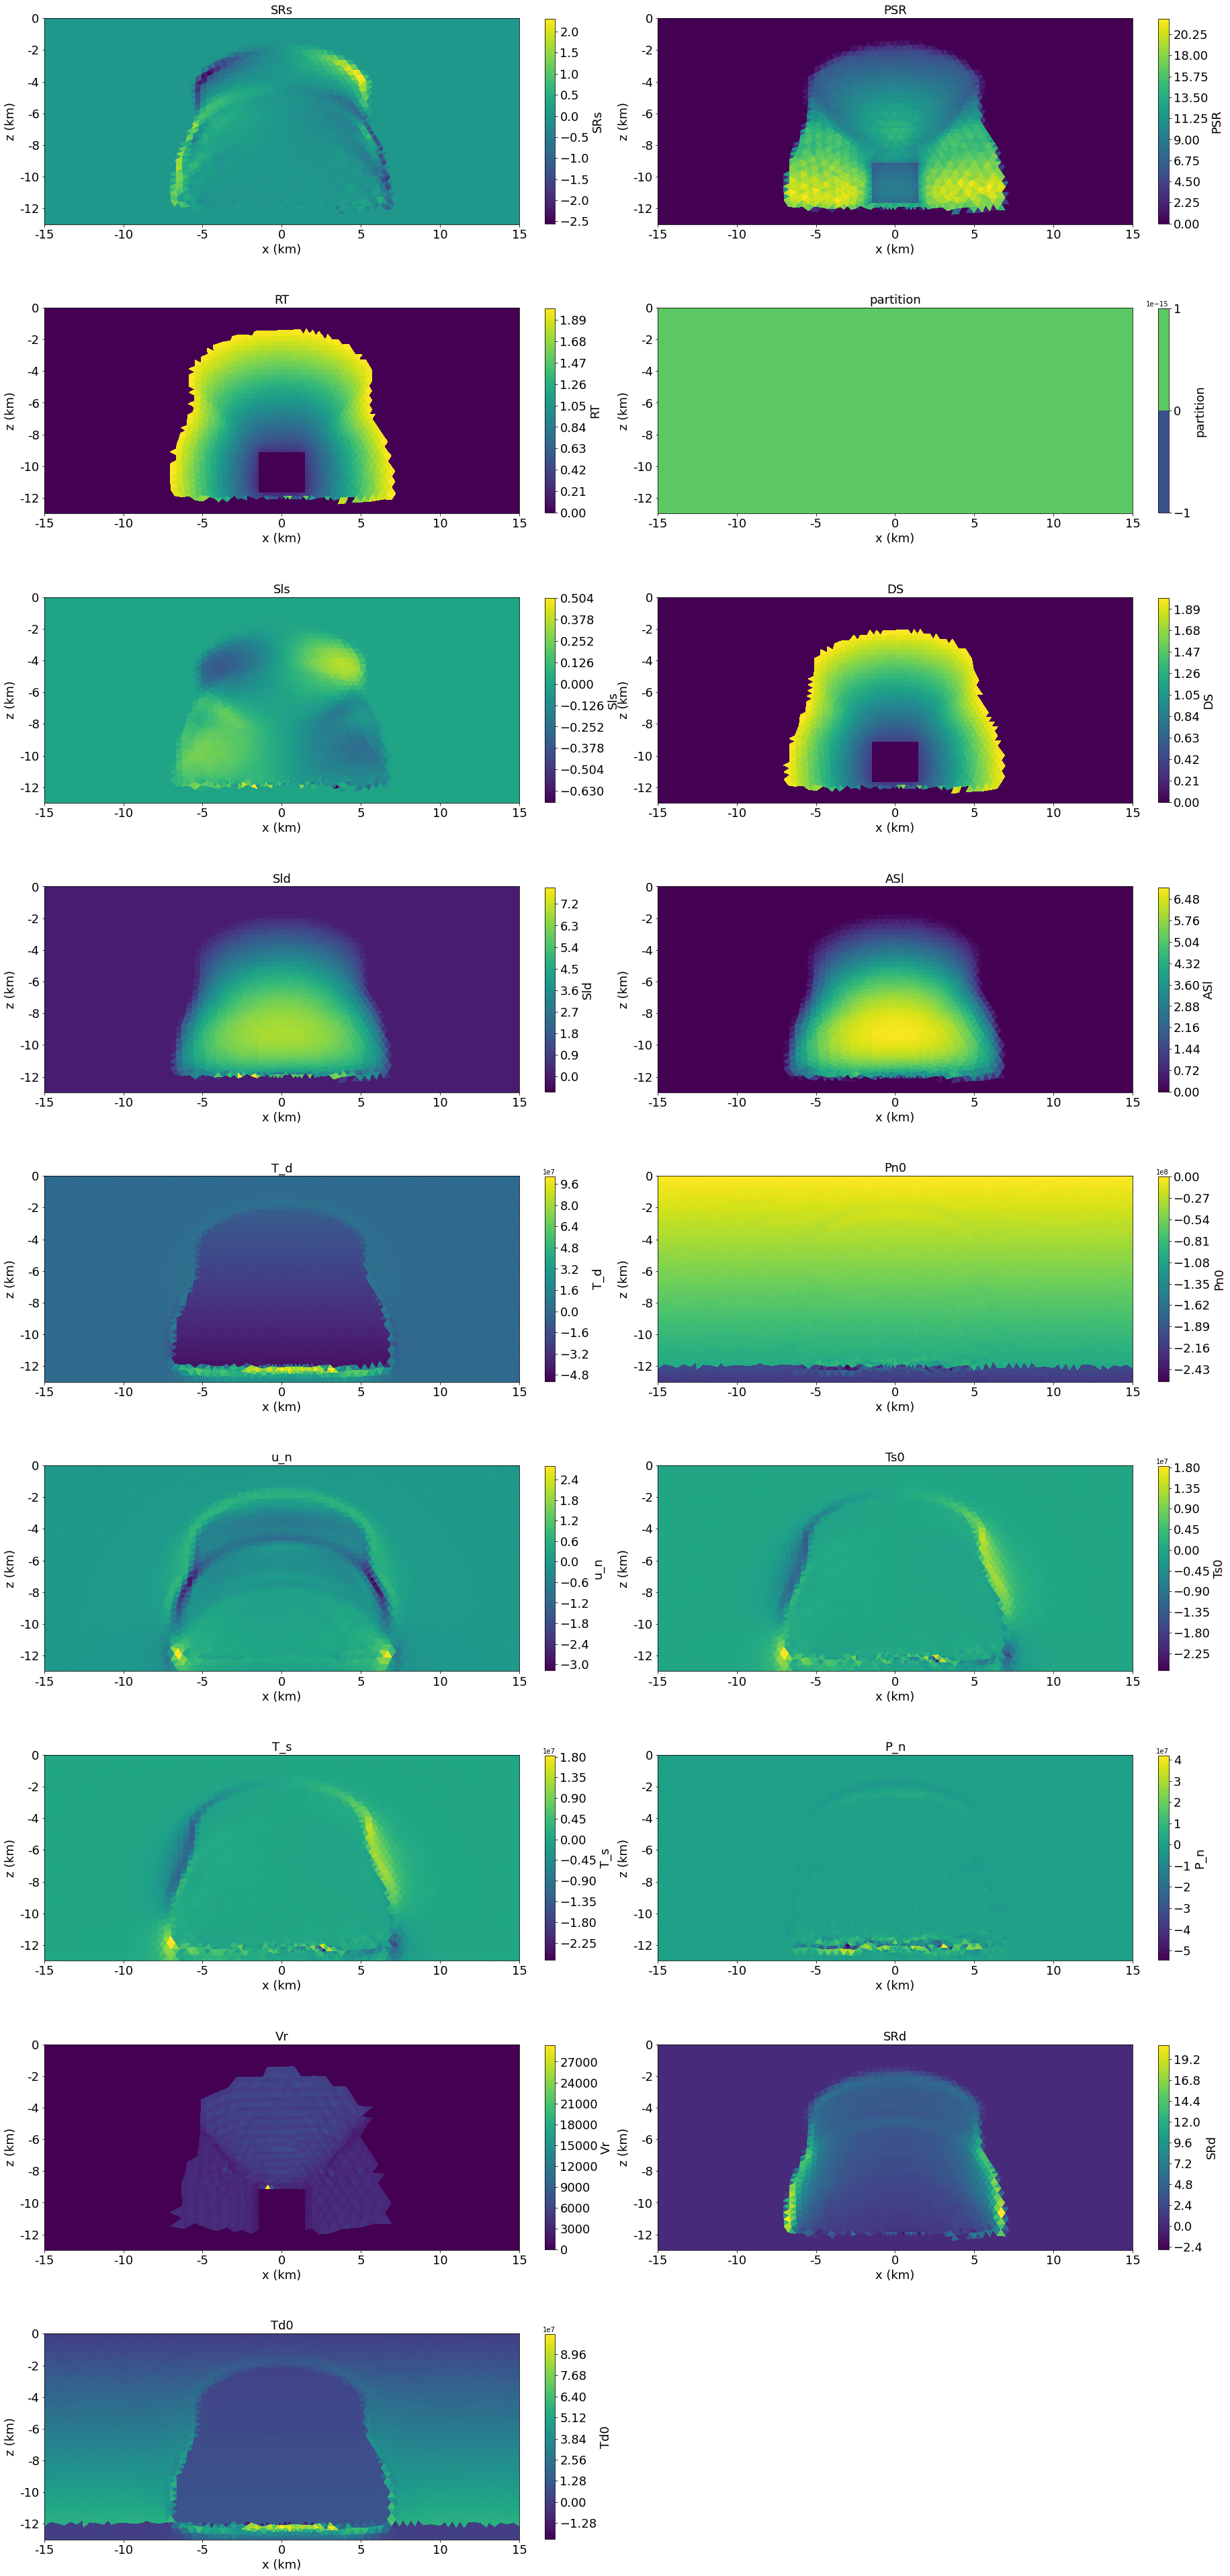

In [26]:
# set up the plot
m,n = int(np.ceil(len(sx.ReadAvailableDataFields()) / 2)), 2
fig = plt.figure(figsize=(30,70))
plt.tight_layout()
fs = 18 # font size 

# loop through each variable and make a subplot for it


for i in range(len(var_list)):
    var = var_list[i]
    assert var in sx.ReadAvailableDataFields() # Check, whether variable var exists in the SeisSol output
    out = sx.ReadData(var) # load SRs as a numpy array of shape ((ndt, nElements))
    if out.ndim > 1:
        result = out[ts, :]
    else:
        result = out
    out_rep = np.repeat(result,3,axis=0)

    # plotting bit
    ax = fig.add_subplot(m,n,i+1)
    ax.set_aspect('equal')
    cfill = ax.tricontourf(tri_mesh, out_rep, levels=200, cmap='viridis') # core line
    cb = plt.colorbar(cfill, ax=ax, fraction=0.02)
    cb.set_label(label=var, fontsize=fs)
    cb.ax.tick_params(labelsize=fs)
    ax.set_xlabel('x (km)', fontsize=fs)
    ax.set_ylabel('z (km)', fontsize=fs)
    ax.set_yticks(fontsize=fs,\
                    ticks=[0,-2000,-4000,-6000,-8000,-10000,-12000],\
                    labels=["0","-2","-4","-6","-8","-10","-12"])
    ax.set_xticks(fontsize=fs,\
                    ticks=[-15000,-10000,-5000,0,5000,10000,15000],\
                    labels=["-15","-10","-5","0","5","10","15"])
    ax.set_title(var,fontsize=fs);

### Plotting one variable over time

In [27]:
import time

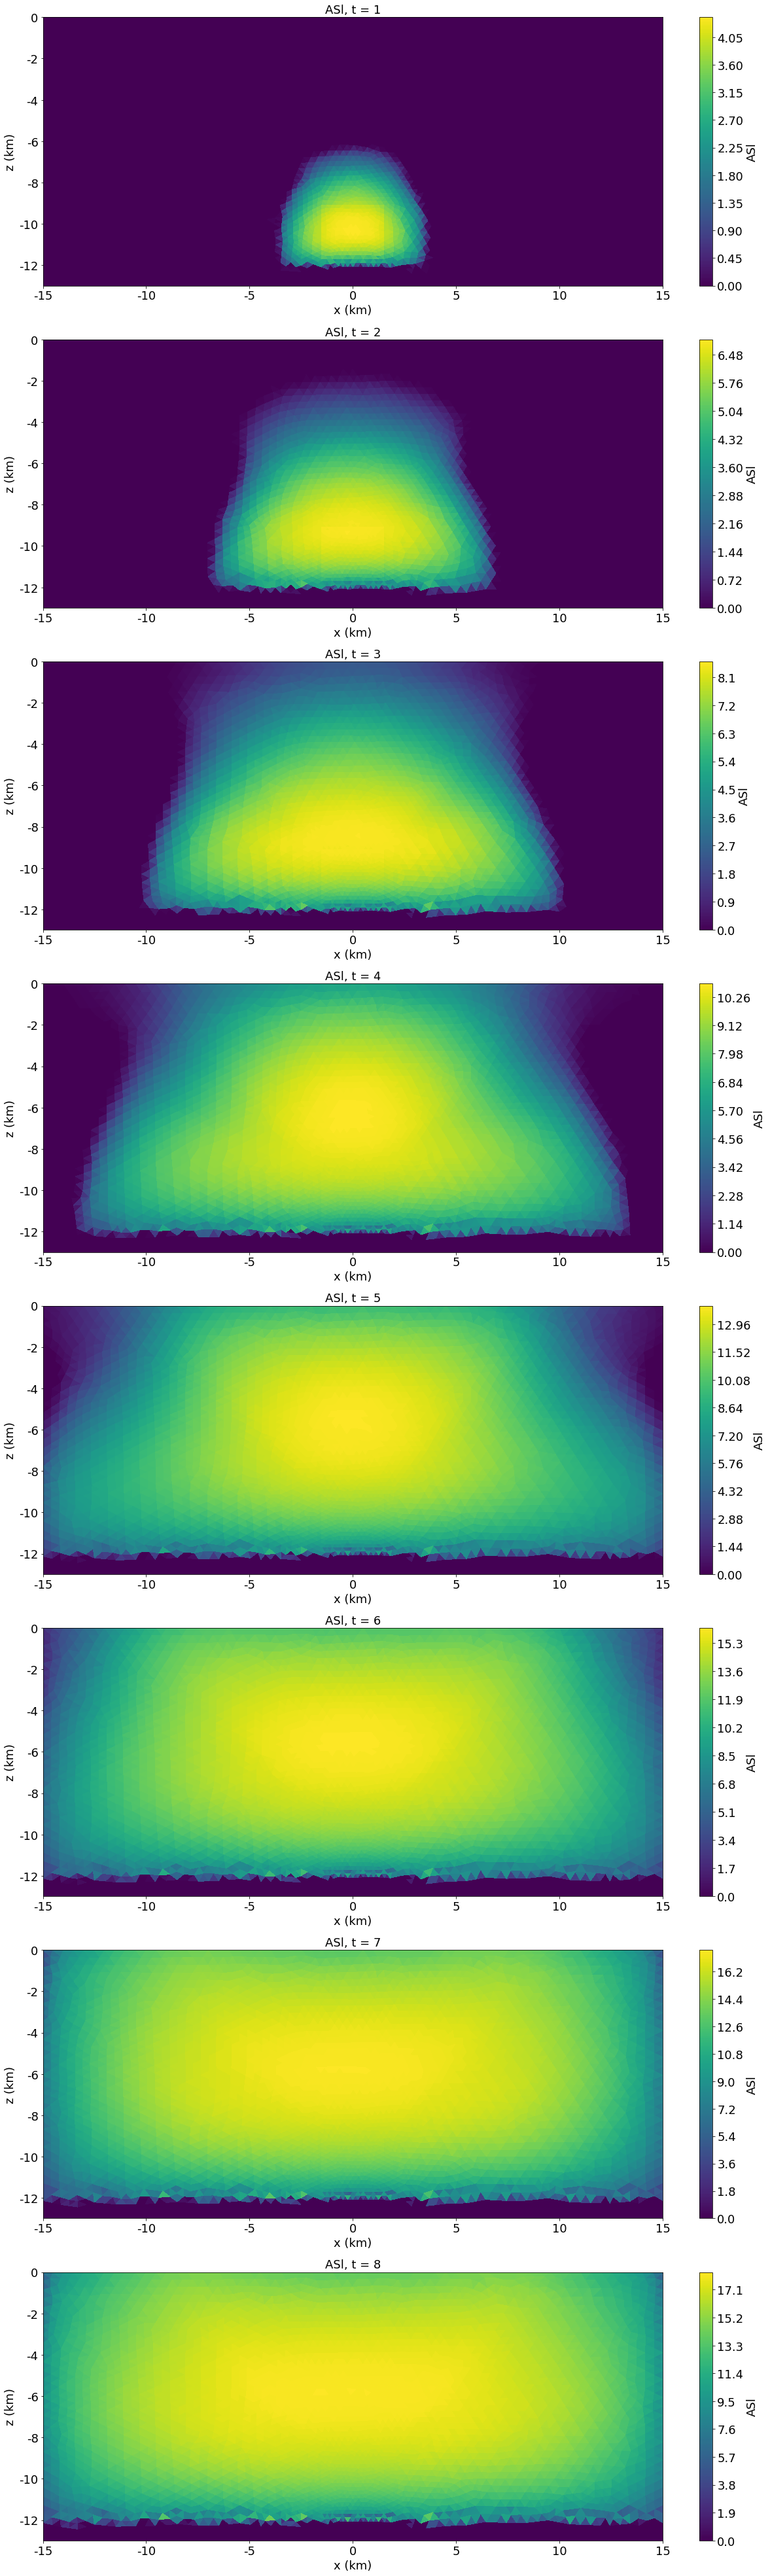

In [28]:
var = 'ASl'

# ndt = sx.ReadNdt()

out = sx.ReadData(var)

fig = plt.figure(figsize=(20,80))
plt.tight_layout()
fs = 18 # font size 
i = 1

for ts in range(1,ndt):
    result = out[ts, :] # slice out time step
    out_rep = np.repeat(result,3,axis=0)
    
    ax = fig.add_subplot(ndt,1,i)
    ax.set_aspect('equal')
    cfill = ax.tricontourf(tri_mesh, out_rep, levels=200, cmap='viridis') # core line
    cb = plt.colorbar(cfill, ax=ax, fraction=0.02)
    cb.set_label(label=var, fontsize=fs)
    cb.ax.tick_params(labelsize=fs)
    ax.set_xlabel('x (km)', fontsize=fs)
    ax.set_ylabel('z (km)', fontsize=fs)
    ax.set_yticks(fontsize=fs,\
                    ticks=[0,-2000,-4000,-6000,-8000,-10000,-12000],\
                    labels=["0","-2","-4","-6","-8","-10","-12"])
    ax.set_xticks(fontsize=fs,\
                    ticks=[-15000,-10000,-5000,0,5000,10000,15000],\
                    labels=["-15","-10","-5","0","5","10","15"])
    ax.set_title(var + ", t = " + str(ts),fontsize=fs);
    i += 1

### Saving figures

One last note, if you want to save any of these figures, you can use:

`plt.savefig("test.png")`

or 

`plt.savefig("test.pdf")`